In [1]:
%matplotlib notebook
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

import torch
from torch.autograd import Variable

In [2]:
lr = 0.01
nb_epoch = 1000
γ = 1

In [3]:
A = Variable(torch.Tensor([[1,2],[2,4]]))
eigs = torch.eig(A.data, eigenvectors=True)[1]

In [4]:
hist_penalty = []
x = Variable(torch.Tensor([0.0,1.0]).float(), requires_grad=True)
for i in range(nb_epoch):
    hist_penalty.append(x.data.numpy().copy())
    loss = torch.dot(x,torch.mv(A,x)) + torch.abs(1-x.norm()) * γ
    loss.backward()
    x.data -=  x.grad.data * lr
    x.grad.data.zero_()
hist_penalty = np.array(hist_penalty)

In [5]:
def R(x,η):
    return (x+η)/torch.norm(x+η)
def grad_f(x, df):
    return torch.matmul(torch.eye(2) - torch.ger(x,x), df)

In [6]:
hist_manifold = []
lr = 0.1
nb_epoch = 1000

x = Variable(torch.Tensor([0.0,1.0]).float(), requires_grad=True)
for i in range(nb_epoch):
    hist_manifold.append(x.data.numpy().copy())
    loss = torch.dot(x,torch.mv(A,x))
    loss.backward()

    g = grad_f(x.data, x.grad.data)
    x.data = R(x.data, -g * lr)
    x.grad.data.zero_()
hist_manifold = np.array(hist_manifold)

<IPython.core.display.Javascript object>


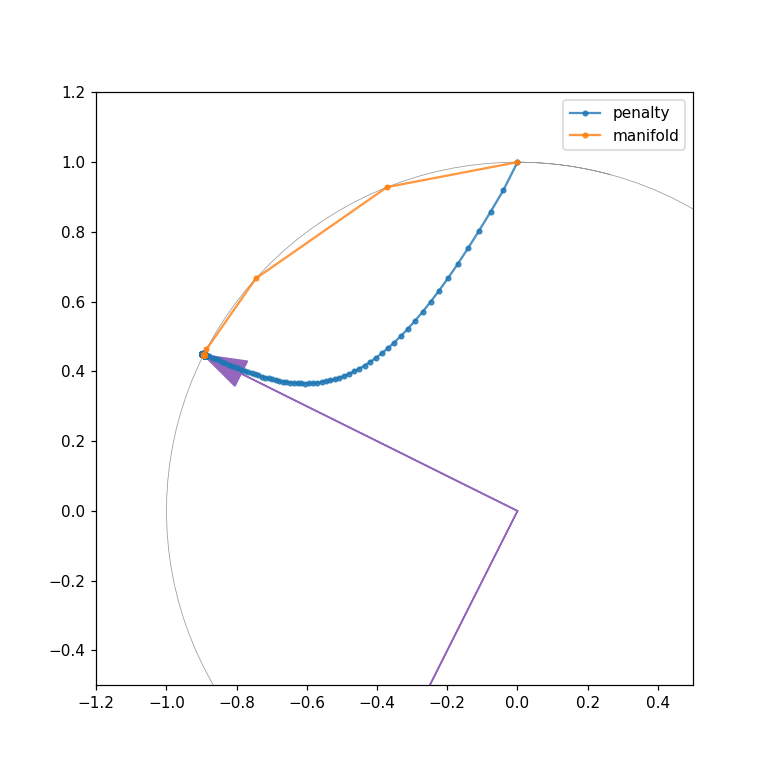

In [7]:
fig = plt.figure(figsize=(7,7))
t = np.arange(0,2.1*np.pi, 0.05)

plt.plot(np.sin(t), np.cos(t), lw=0.5, alpha=0.8, color="gray")
plt.arrow(0,0,eigs.numpy()[0,0], eigs.numpy()[1,0], color="C4",
          length_includes_head=True, head_width=0.08)
plt.arrow(0,0,eigs.numpy()[0,1], eigs.numpy()[1,1], color="C4",
          length_includes_head=True, head_width=0.08)

plt.plot(hist_penalty[:,0], hist_penalty[:,1], label="penalty", 
         marker=".", alpha=0.8, color="C0")
plt.plot(hist_manifold[:,0], hist_manifold[:,1], label="manifold", 
         marker=".", alpha=0.8, color="C1")

plt.legend()
plt.xlim(-1.2, 0.5)
plt.ylim(-0.5,1.2)

plt.show()